In [6]:
import os
from queue import PriorityQueue as PQ
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

scenes=["intersection","merging","roundabout"]
scene=scenes[2]
dir_base=f"/root/autodl-tmp/interaction/AutoBots.new/pics_{scene}"

dir_impr=f"/root/autodl-tmp/interaction/AutoBots.new/pics_ms_{scene}"



In [7]:
base_pics=os.listdir(dir_base) # assert 已按id排序

impr_pics=os.listdir(dir_impr)


#INTERSECTION :349  
#Roundout :779,583
#merging:131


In [8]:
result= PQ()

for i in range(min(len(base_pics),len(impr_pics))):
    #遍历 ，并按精度差距排序
    
    base_id=base_pics[i].split("_")[0]
    base_matirx=float(base_pics[i].split("_")[1][:3]) # 去掉.png后缀
    
    
    impr_id=impr_pics[i].split("_")[0]
    impr_matirx=float(impr_pics[i].split("_")[1][:3]) # 去掉.png后缀
    
    assert impr_id==base_id
    
    if base_matirx>impr_matirx :
        diff=base_matirx-impr_matirx
        result.put((diff,(base_pics[i],impr_pics[i])))
        

In [9]:
ls=[]
while not result.empty():
    ls.append(result.get())
ls.reverse()
print(ls)

[(0.2, ('981_0.446.png', '981_0.281.png')), (0.2, ('583_0.531.png', '583_0.318.png')), (0.2, ('1267_0.426.png', '1267_0.284.png')), (0.19999999999999998, ('1873_0.324.png', '1873_0.163.png')), (0.10000000000000003, ('962_0.432.png', '962_0.323.png')), (0.10000000000000003, ('940_0.402.png', '940_0.398.png')), (0.10000000000000003, ('779_0.402.png', '779_0.355.png')), (0.10000000000000003, ('734_0.433.png', '734_0.380.png')), (0.10000000000000003, ('706_0.420.png', '706_0.355.png')), (0.10000000000000003, ('469_0.410.png', '469_0.385.png')), (0.10000000000000003, ('452_0.417.png', '452_0.396.png')), (0.10000000000000003, ('434_0.415.png', '434_0.391.png')), (0.10000000000000003, ('359_0.404.png', '359_0.363.png')), (0.10000000000000003, ('302_0.410.png', '302_0.353.png')), (0.10000000000000003, ('29_0.419.png', '29_0.356.png')), (0.10000000000000003, ('1887_0.439.png', '1887_0.387.png')), (0.10000000000000003, ('1694_0.482.png', '1694_0.392.png')), (0.10000000000000003, ('1459_0.418.png

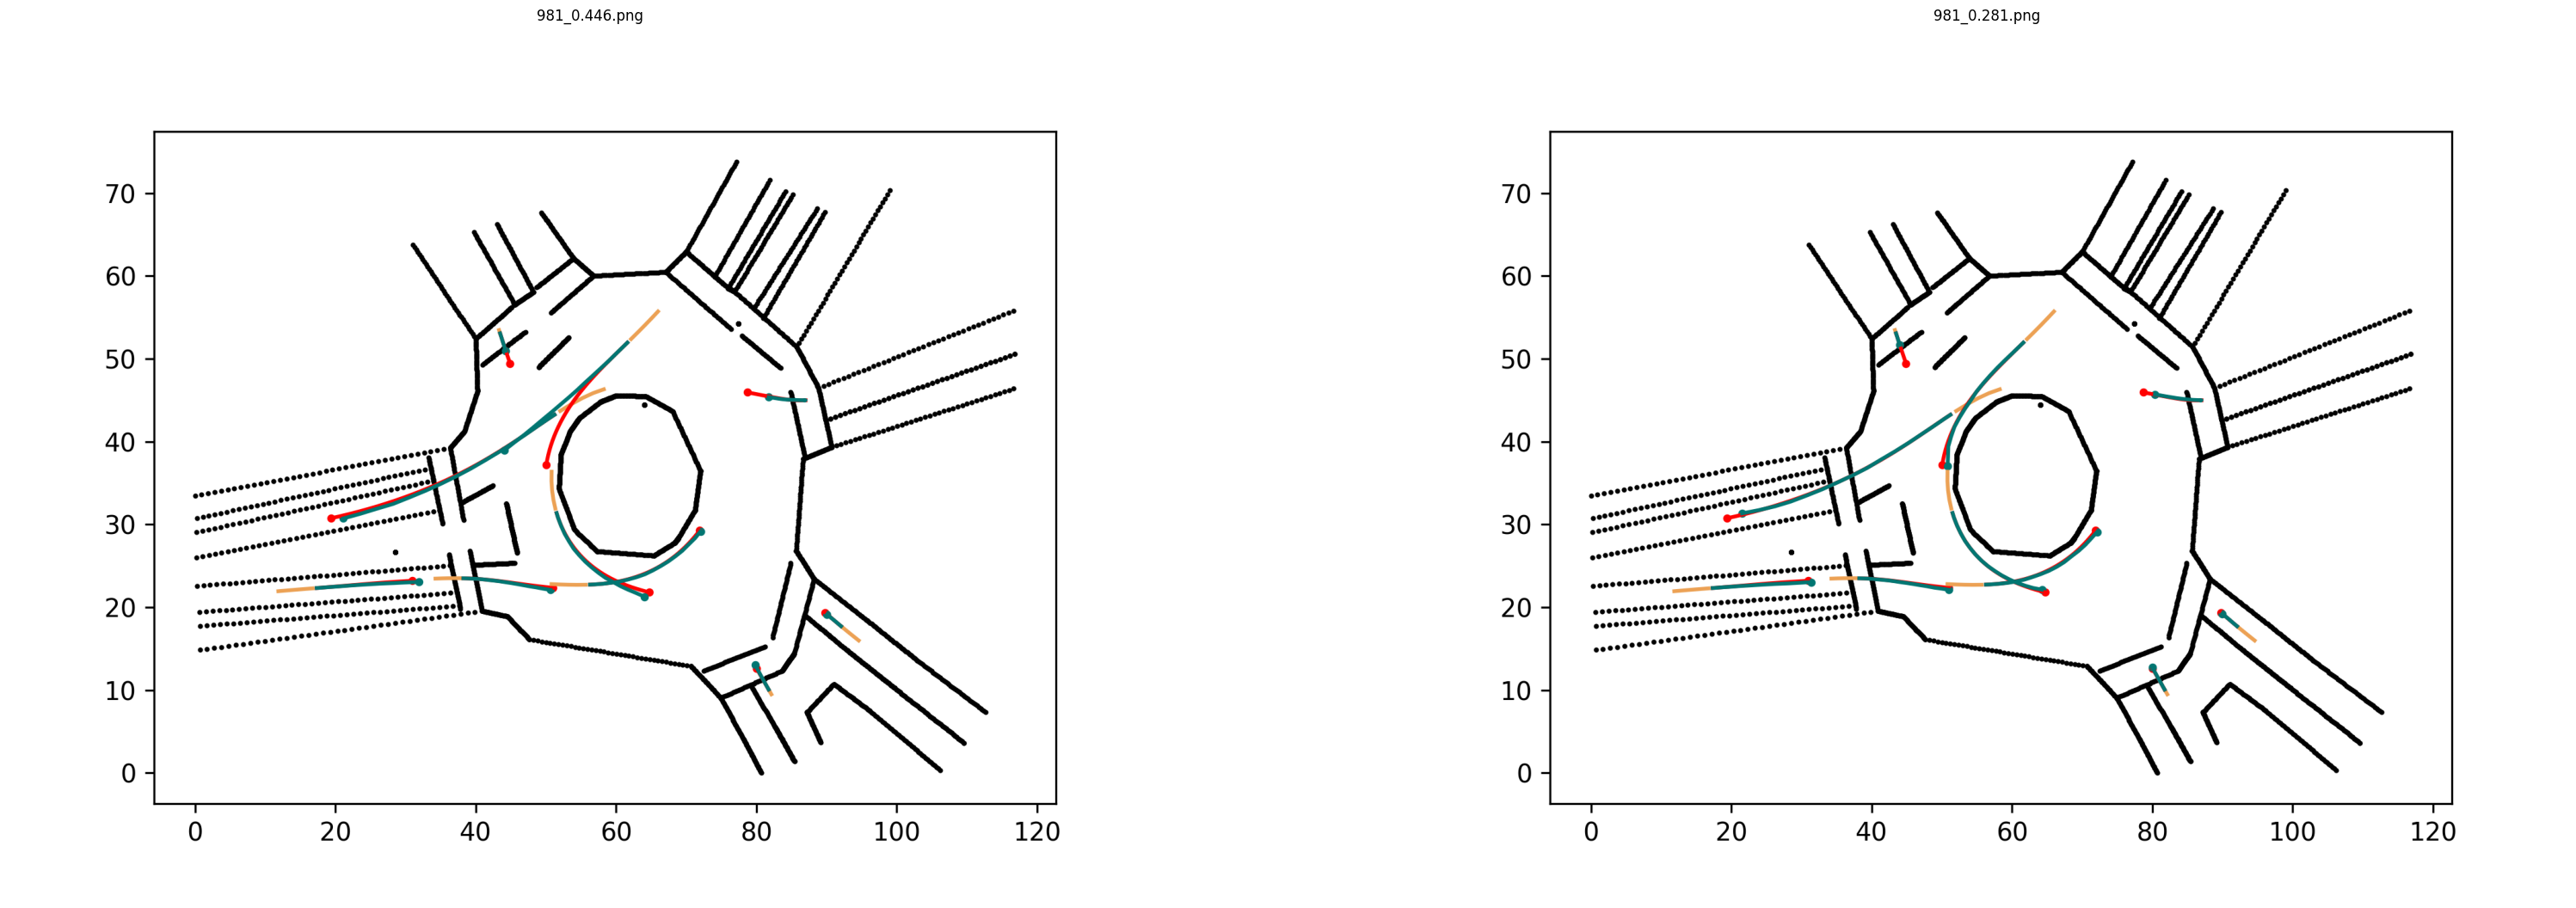

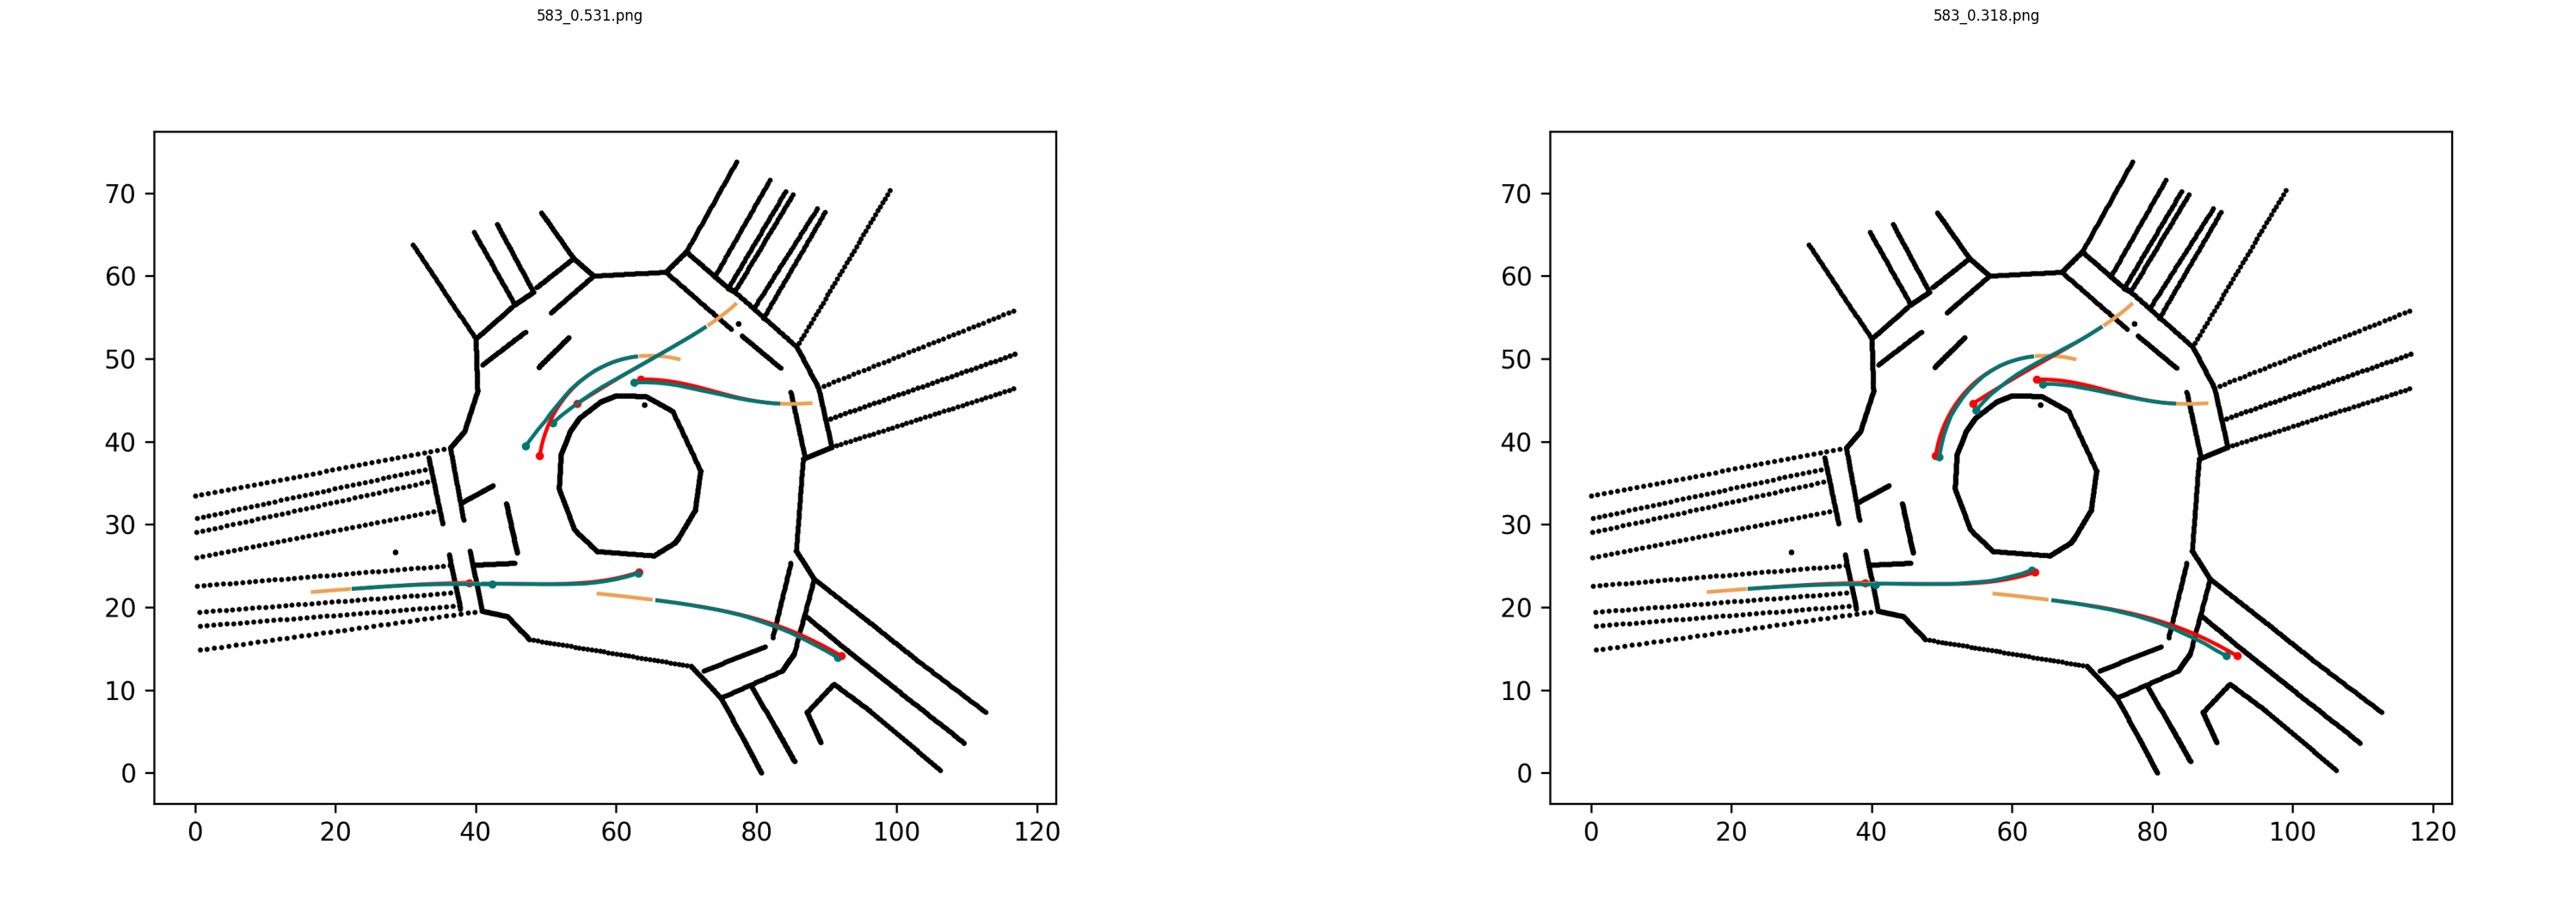

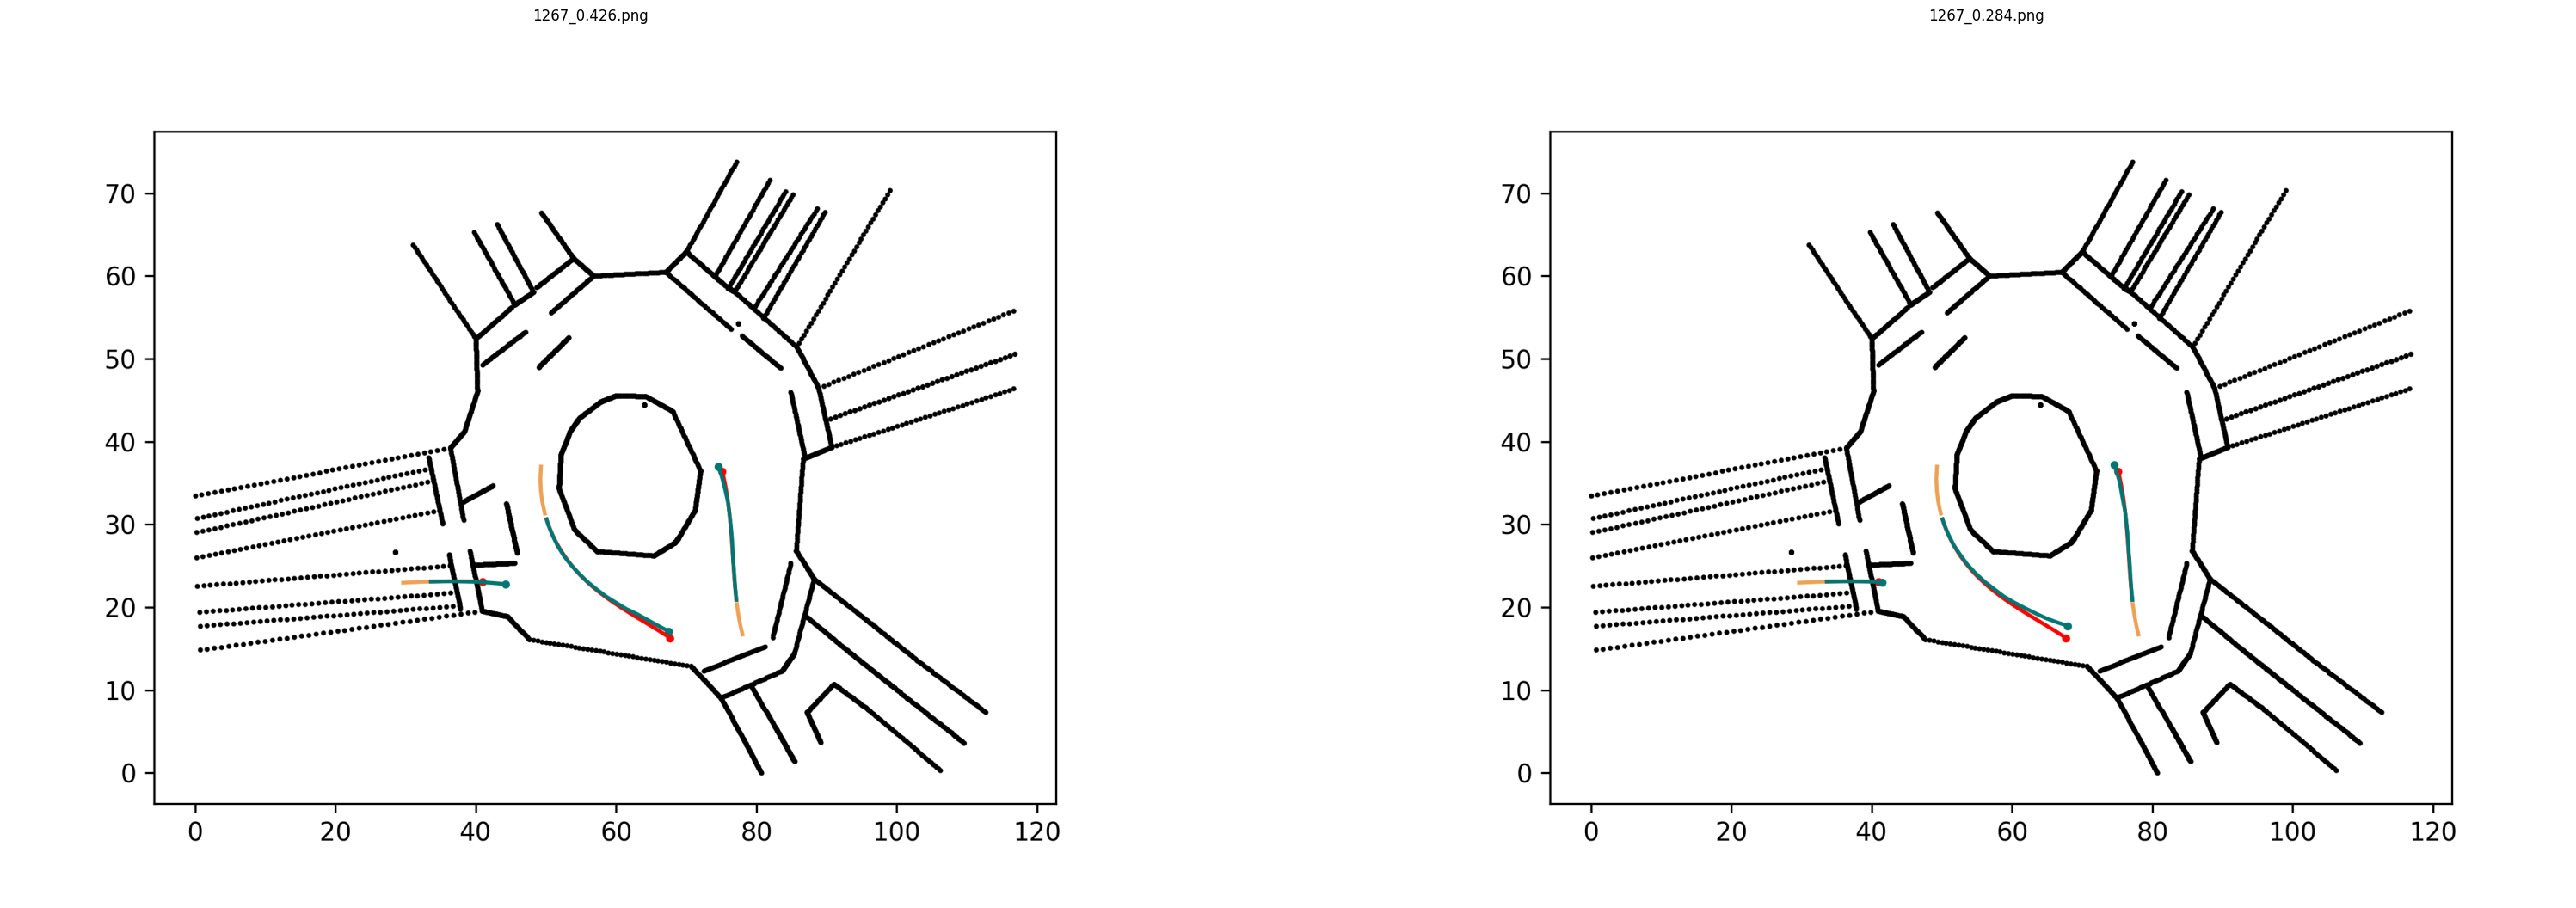

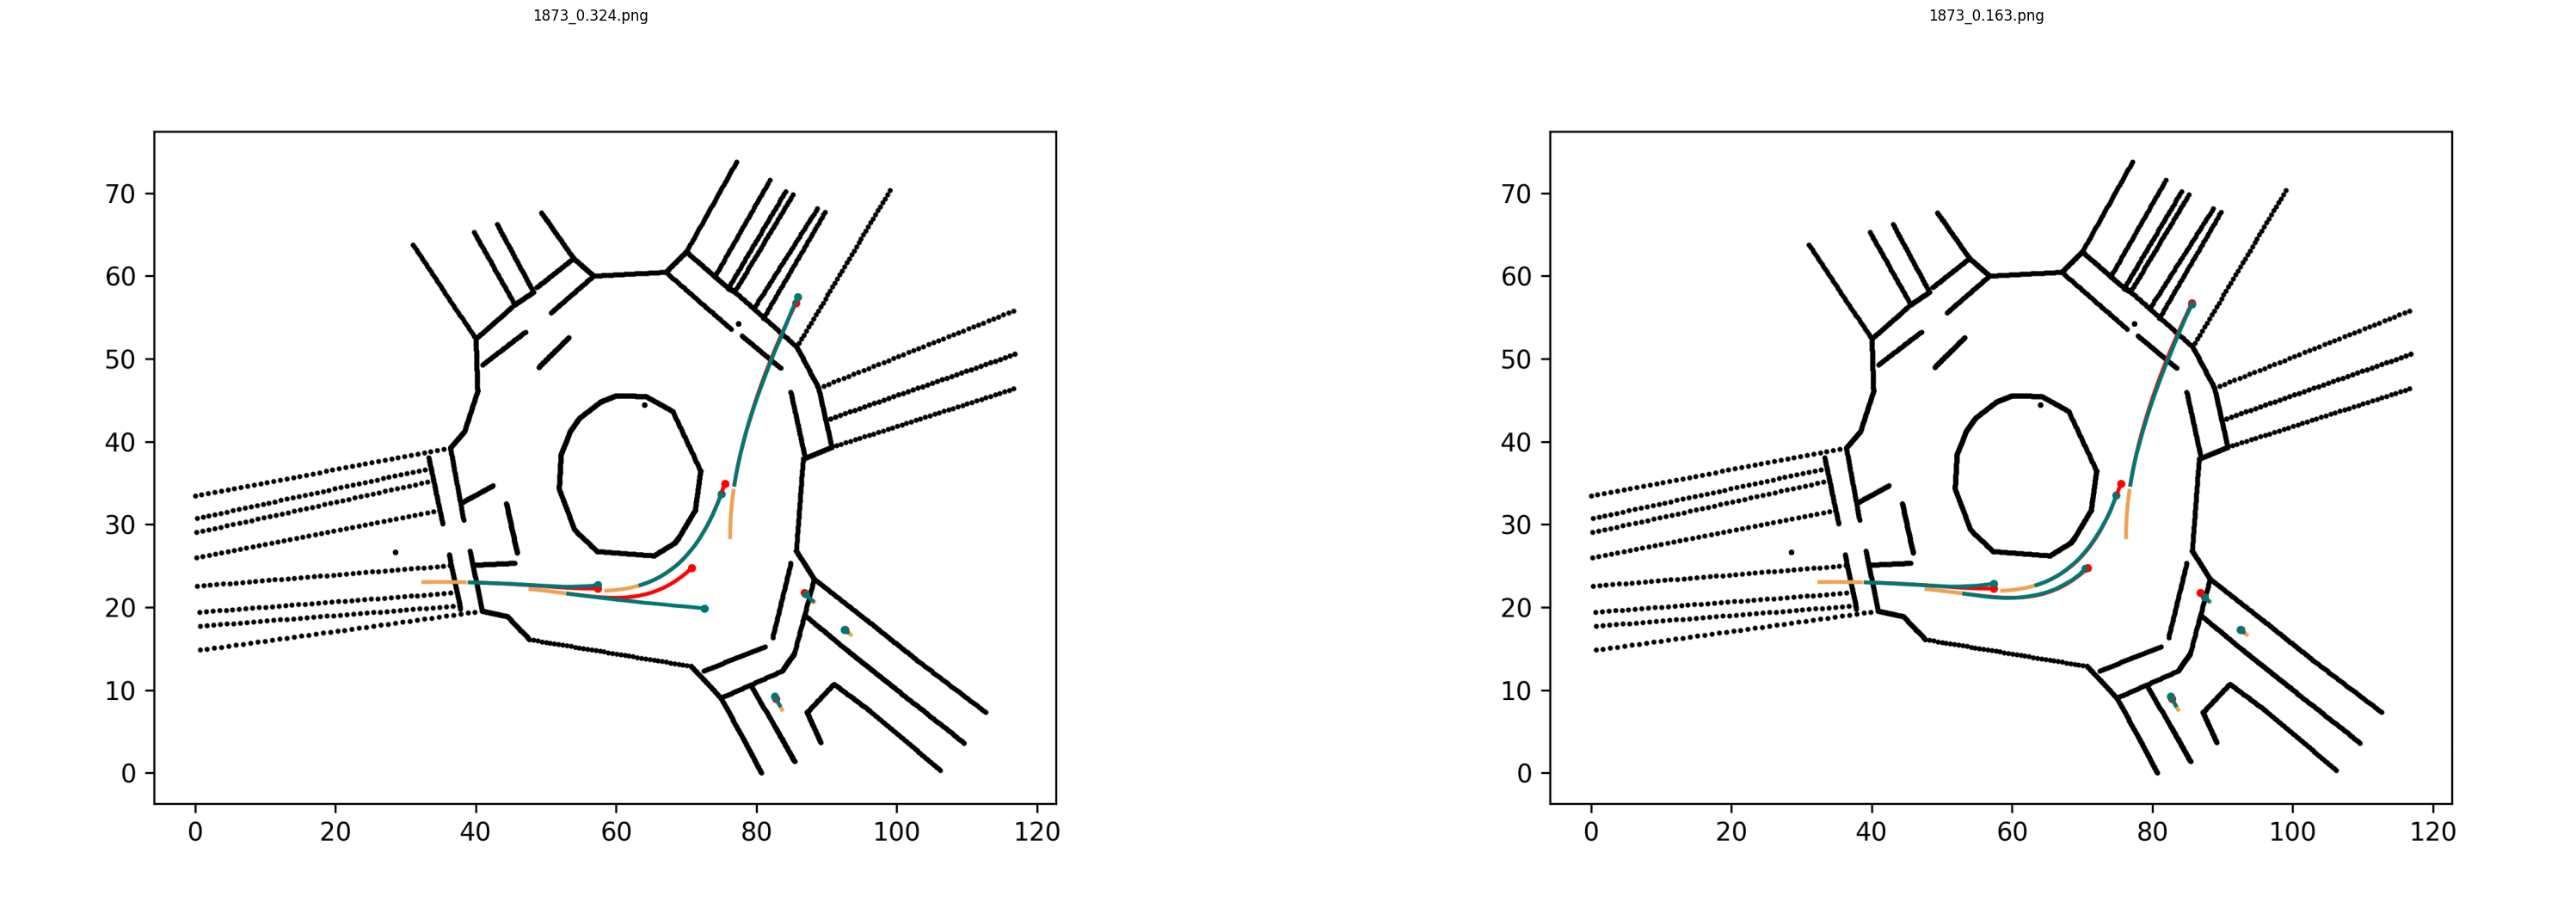

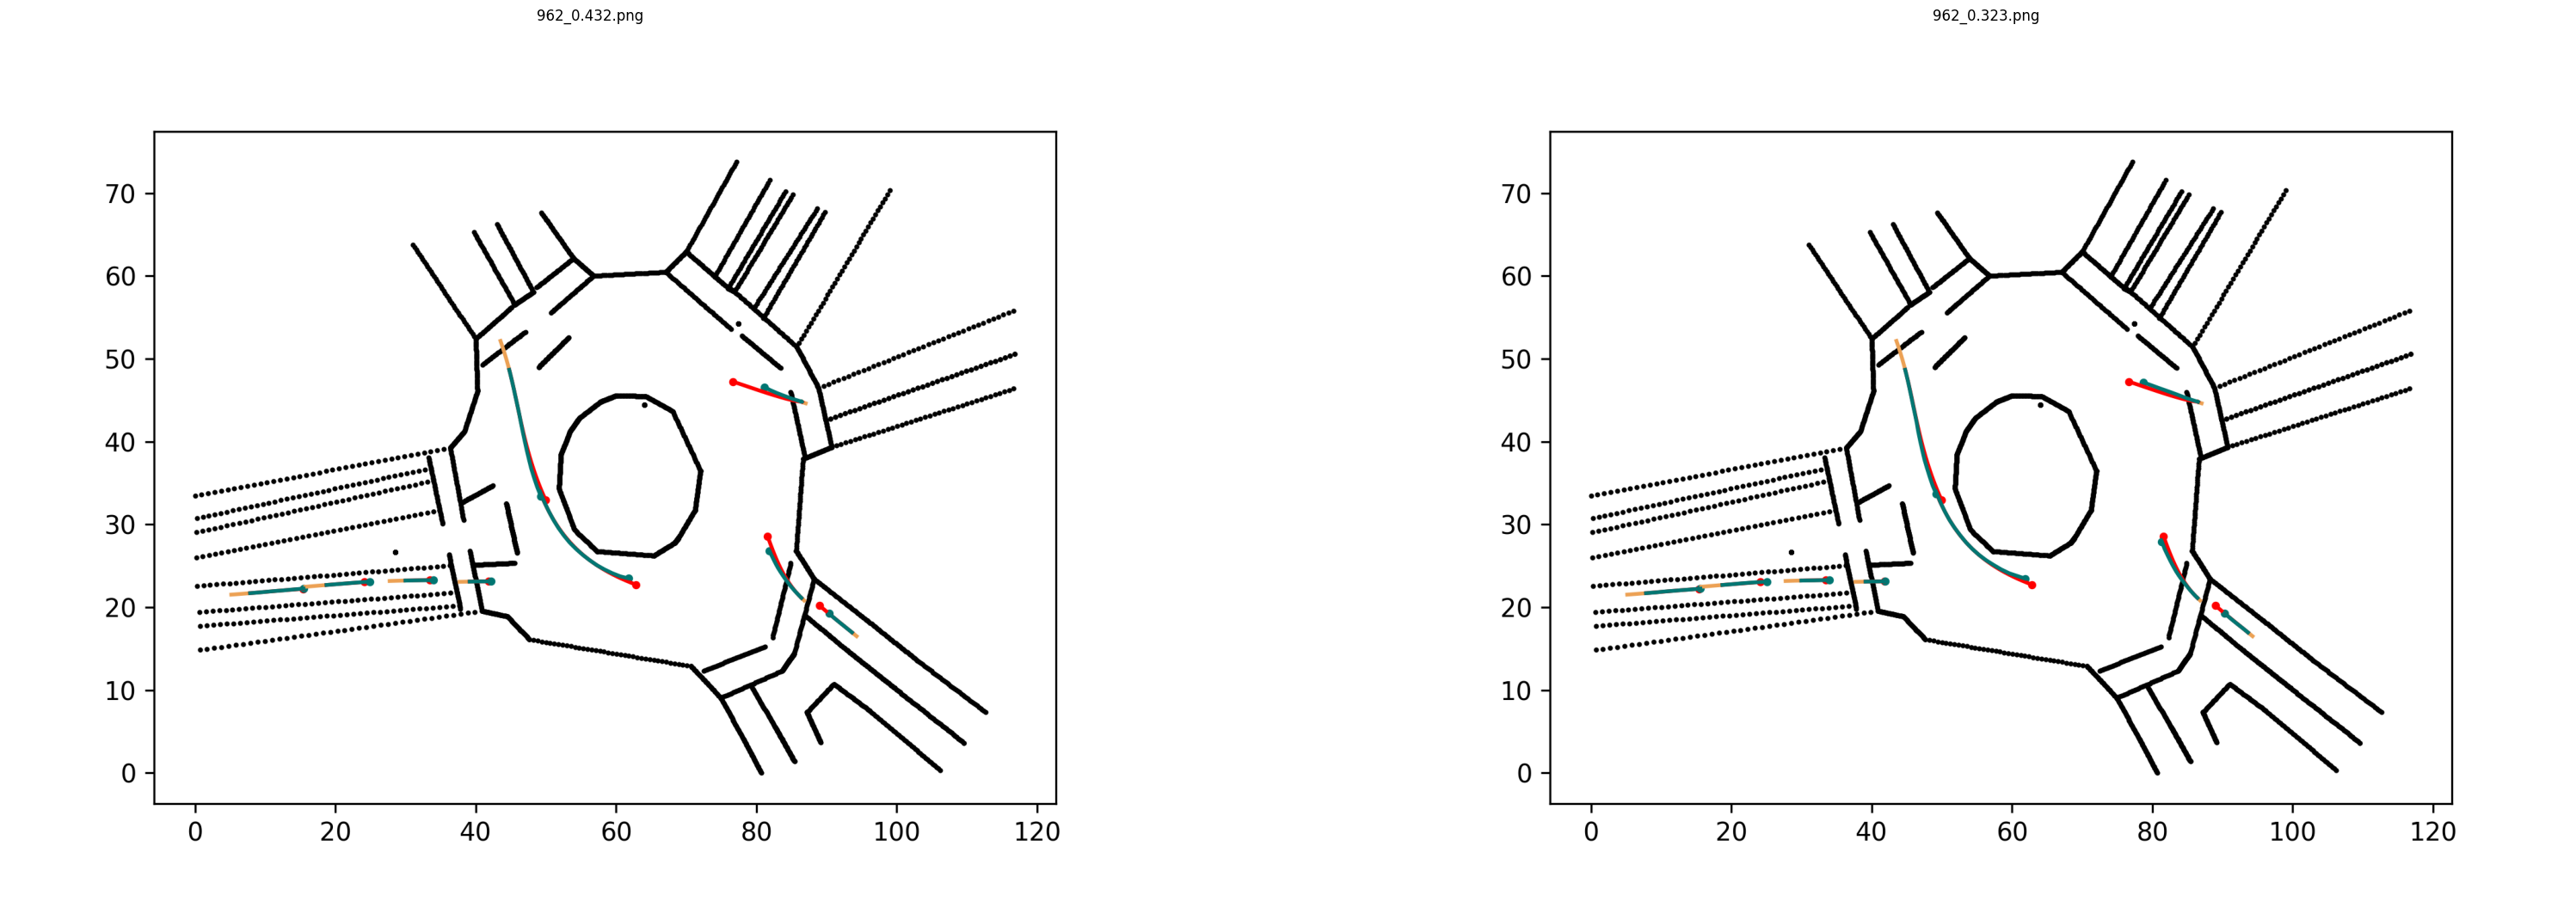

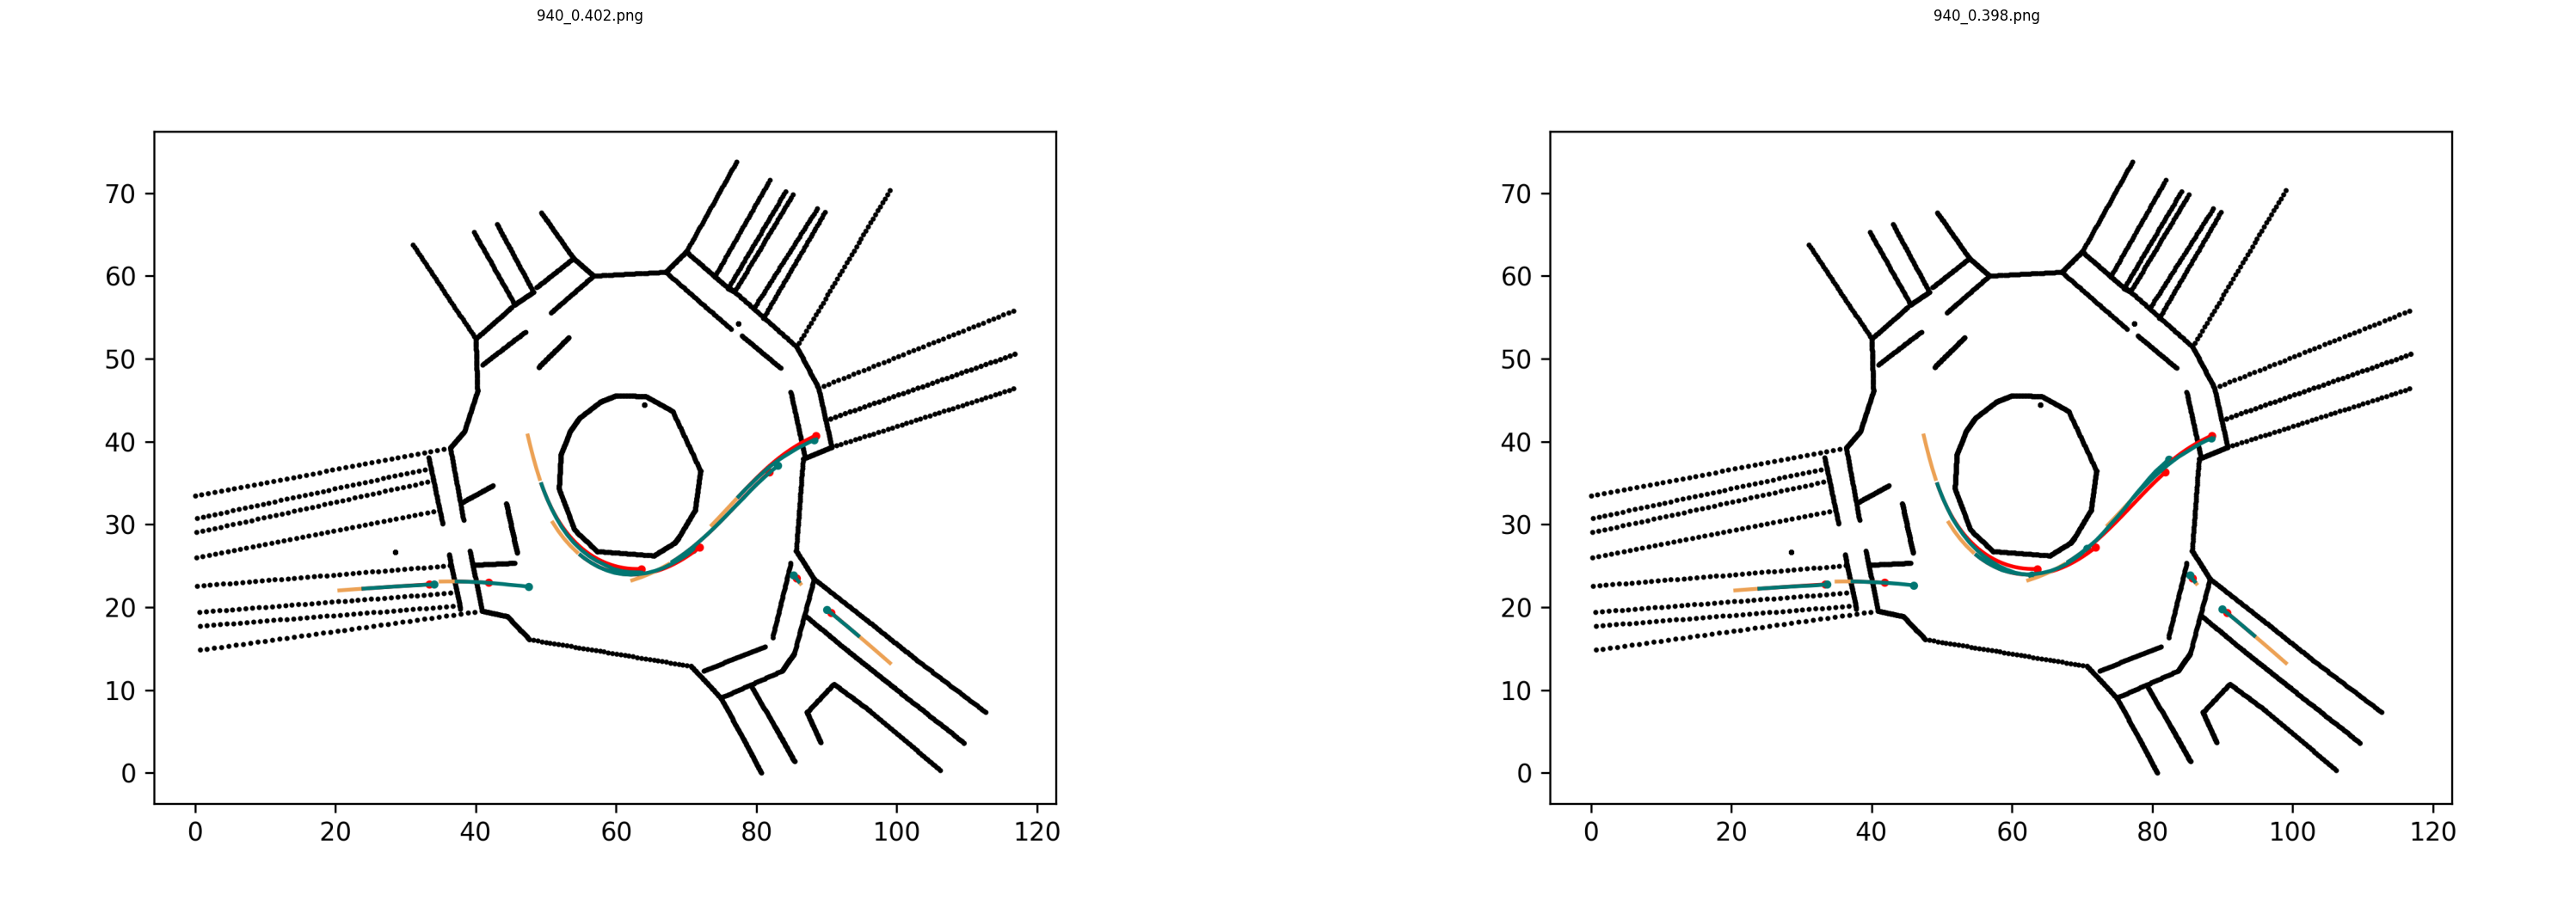

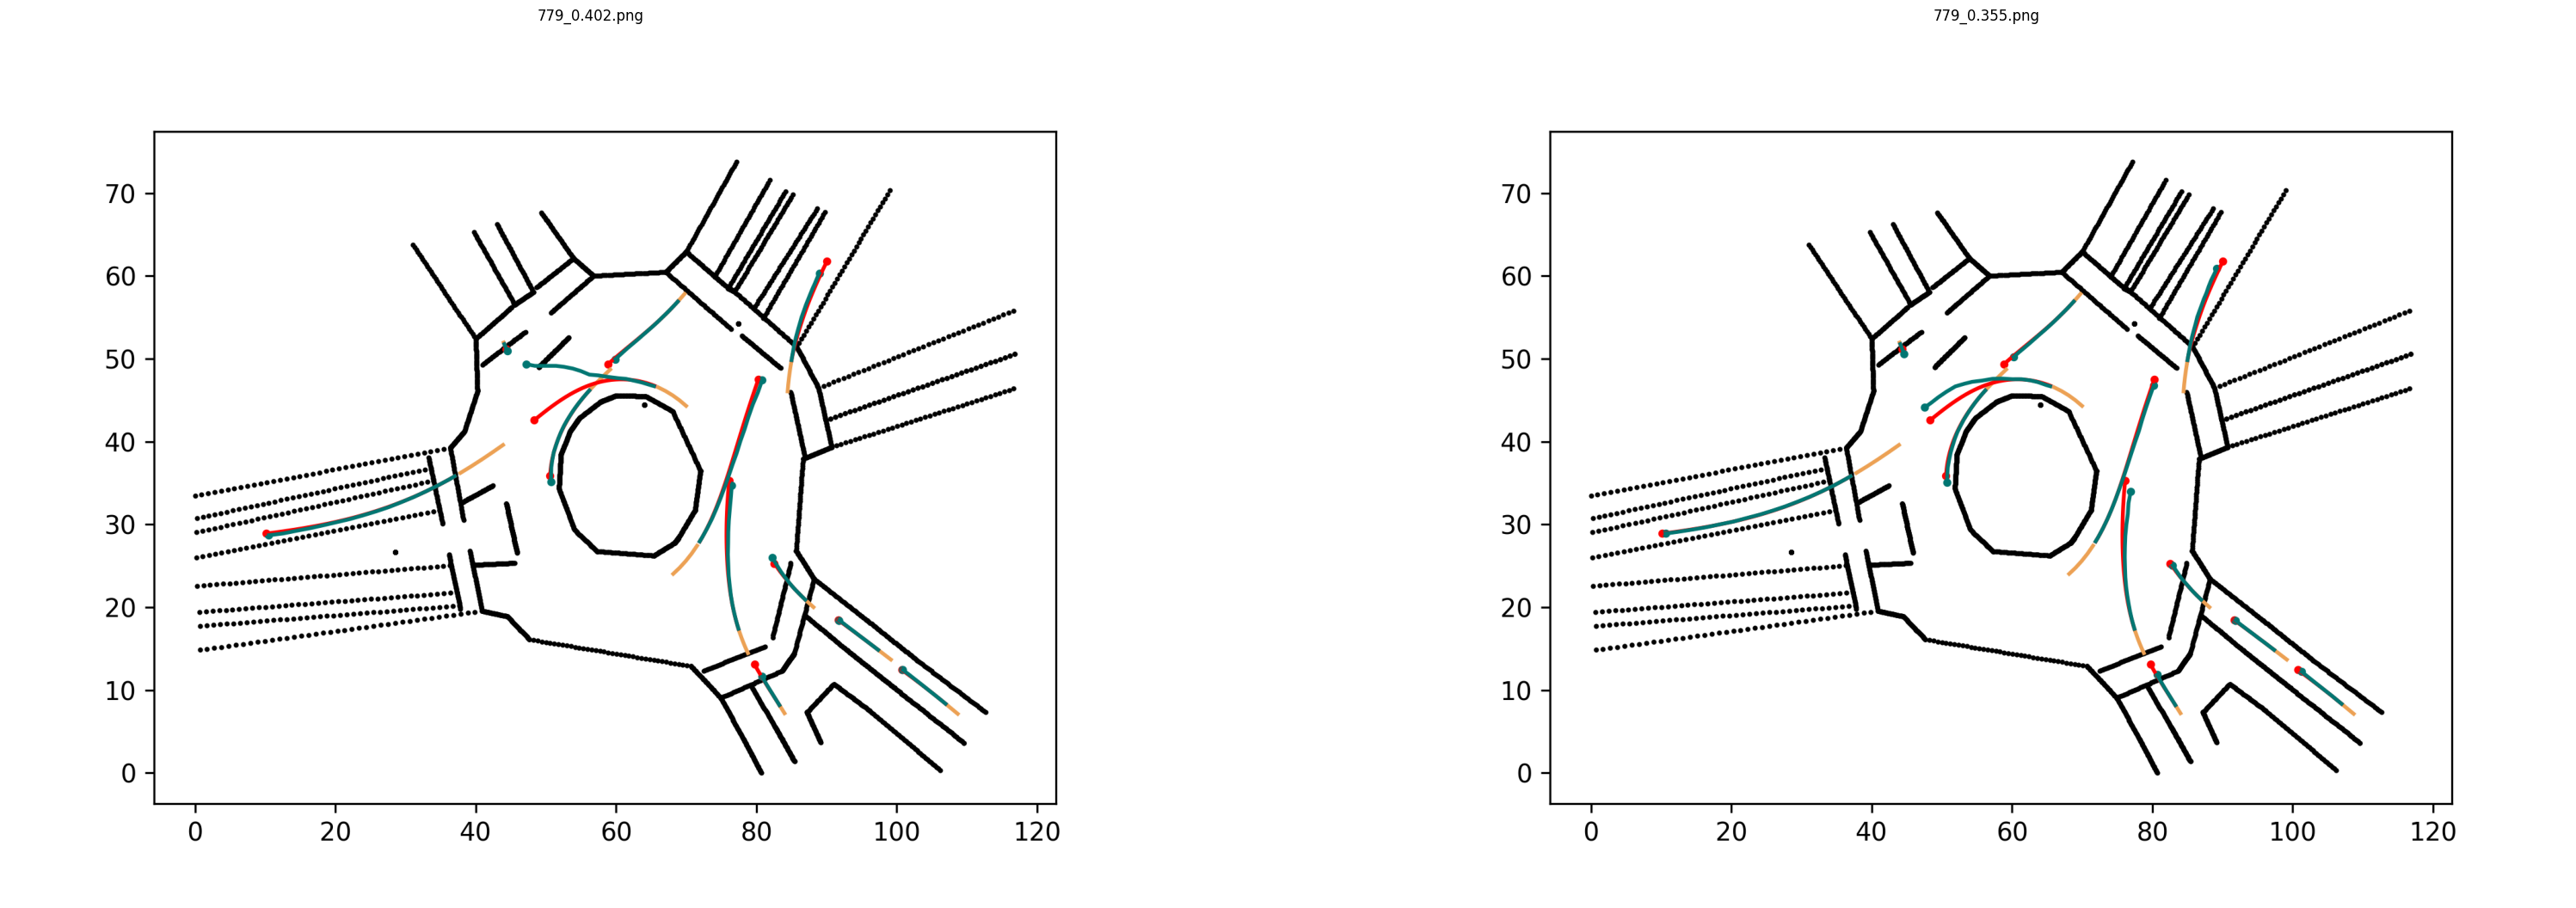

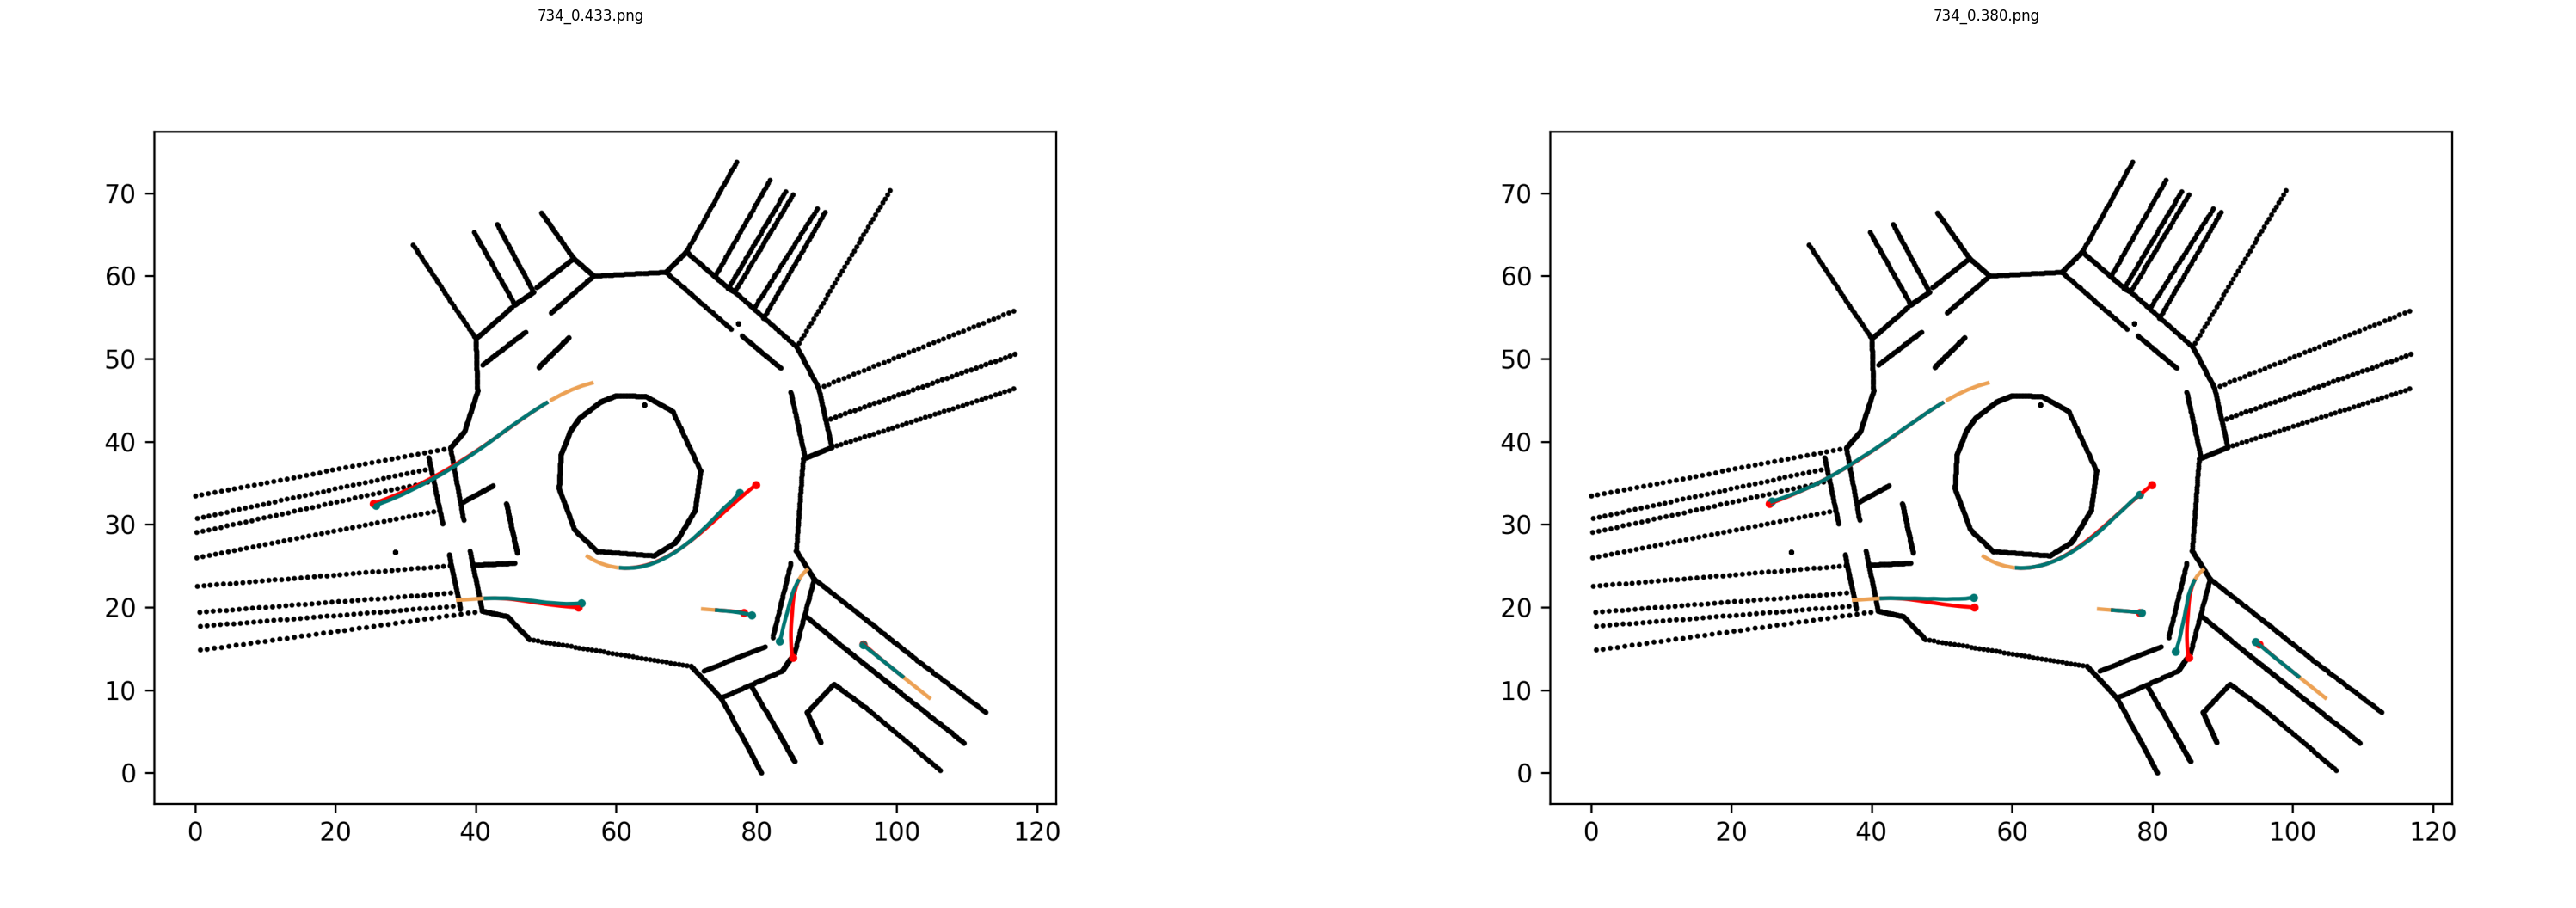

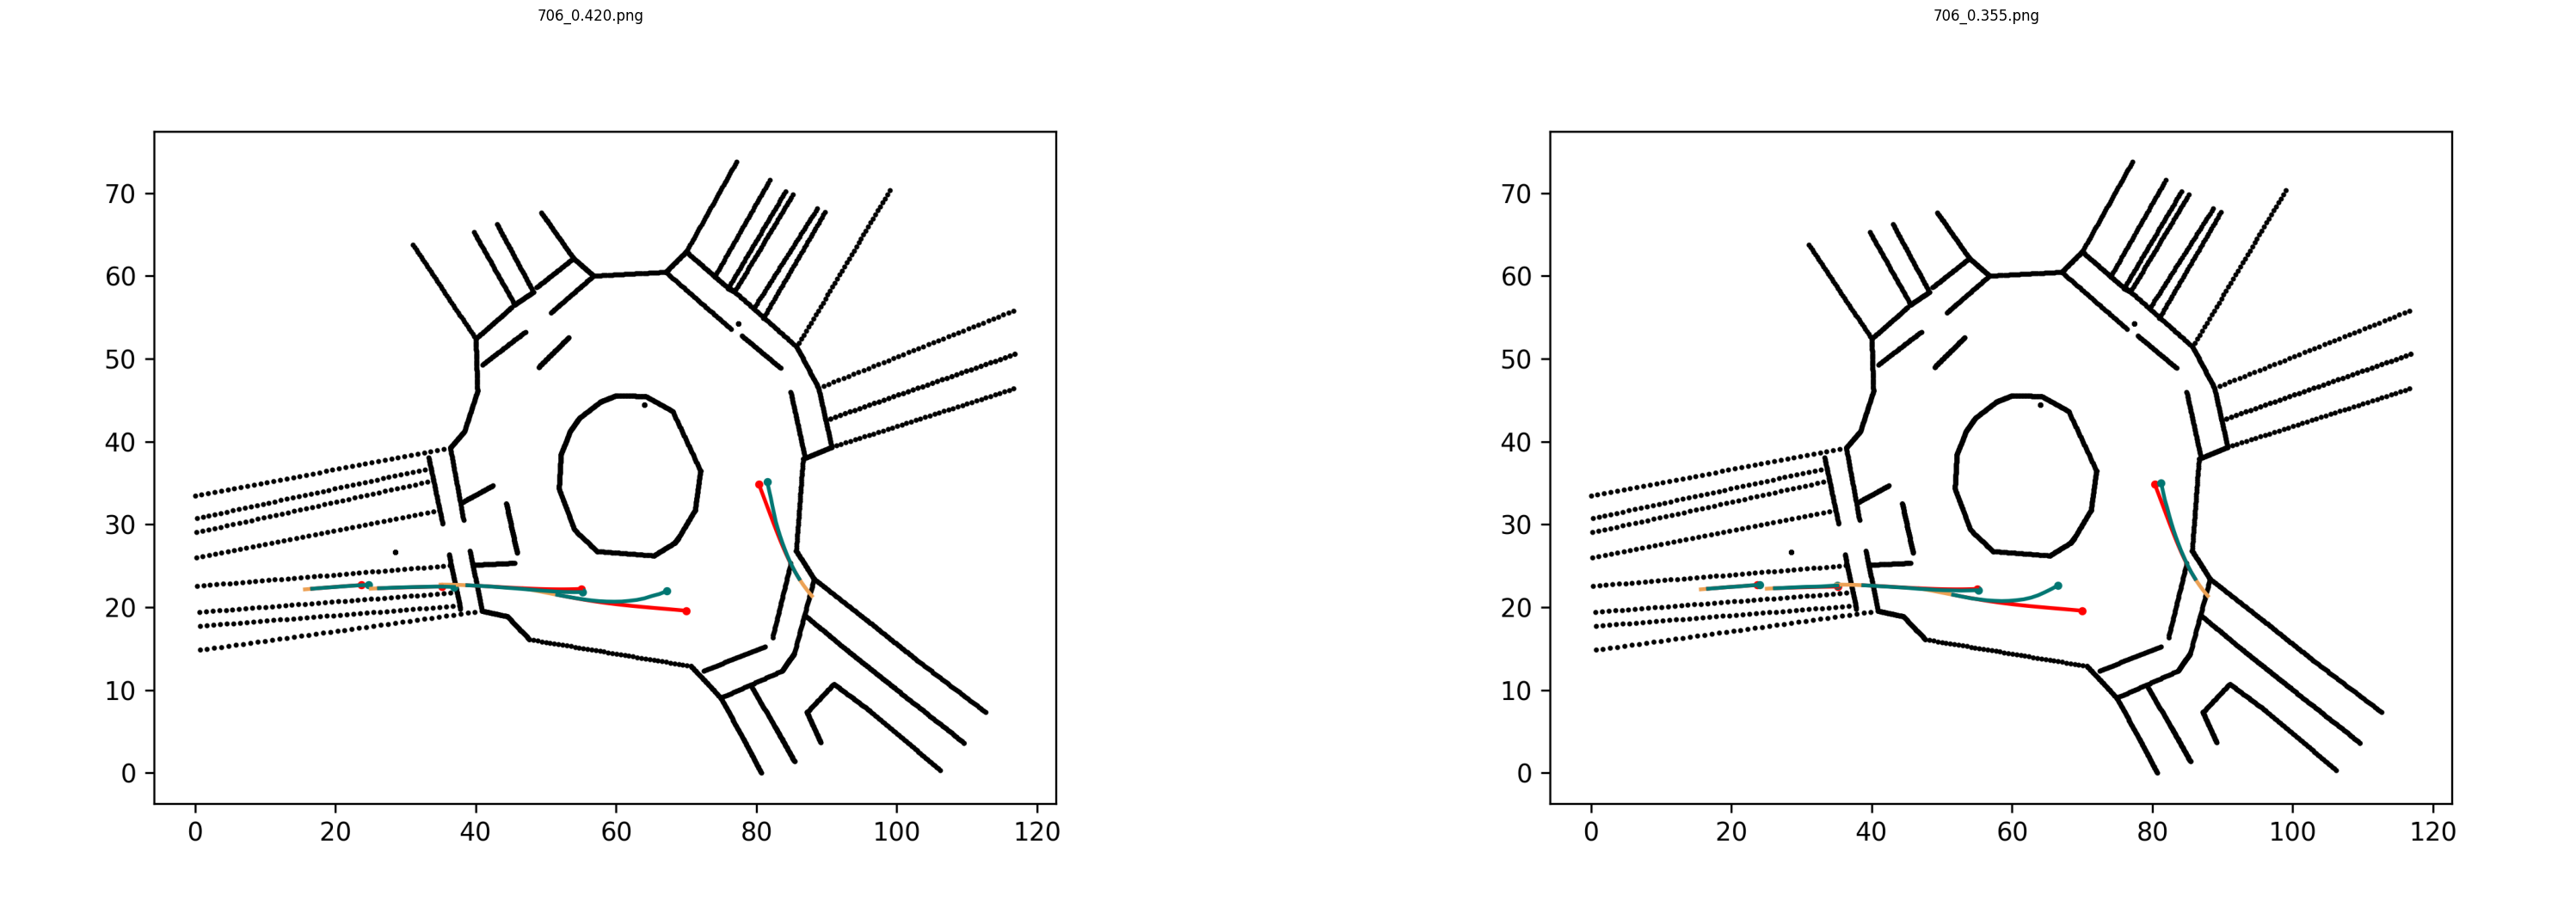

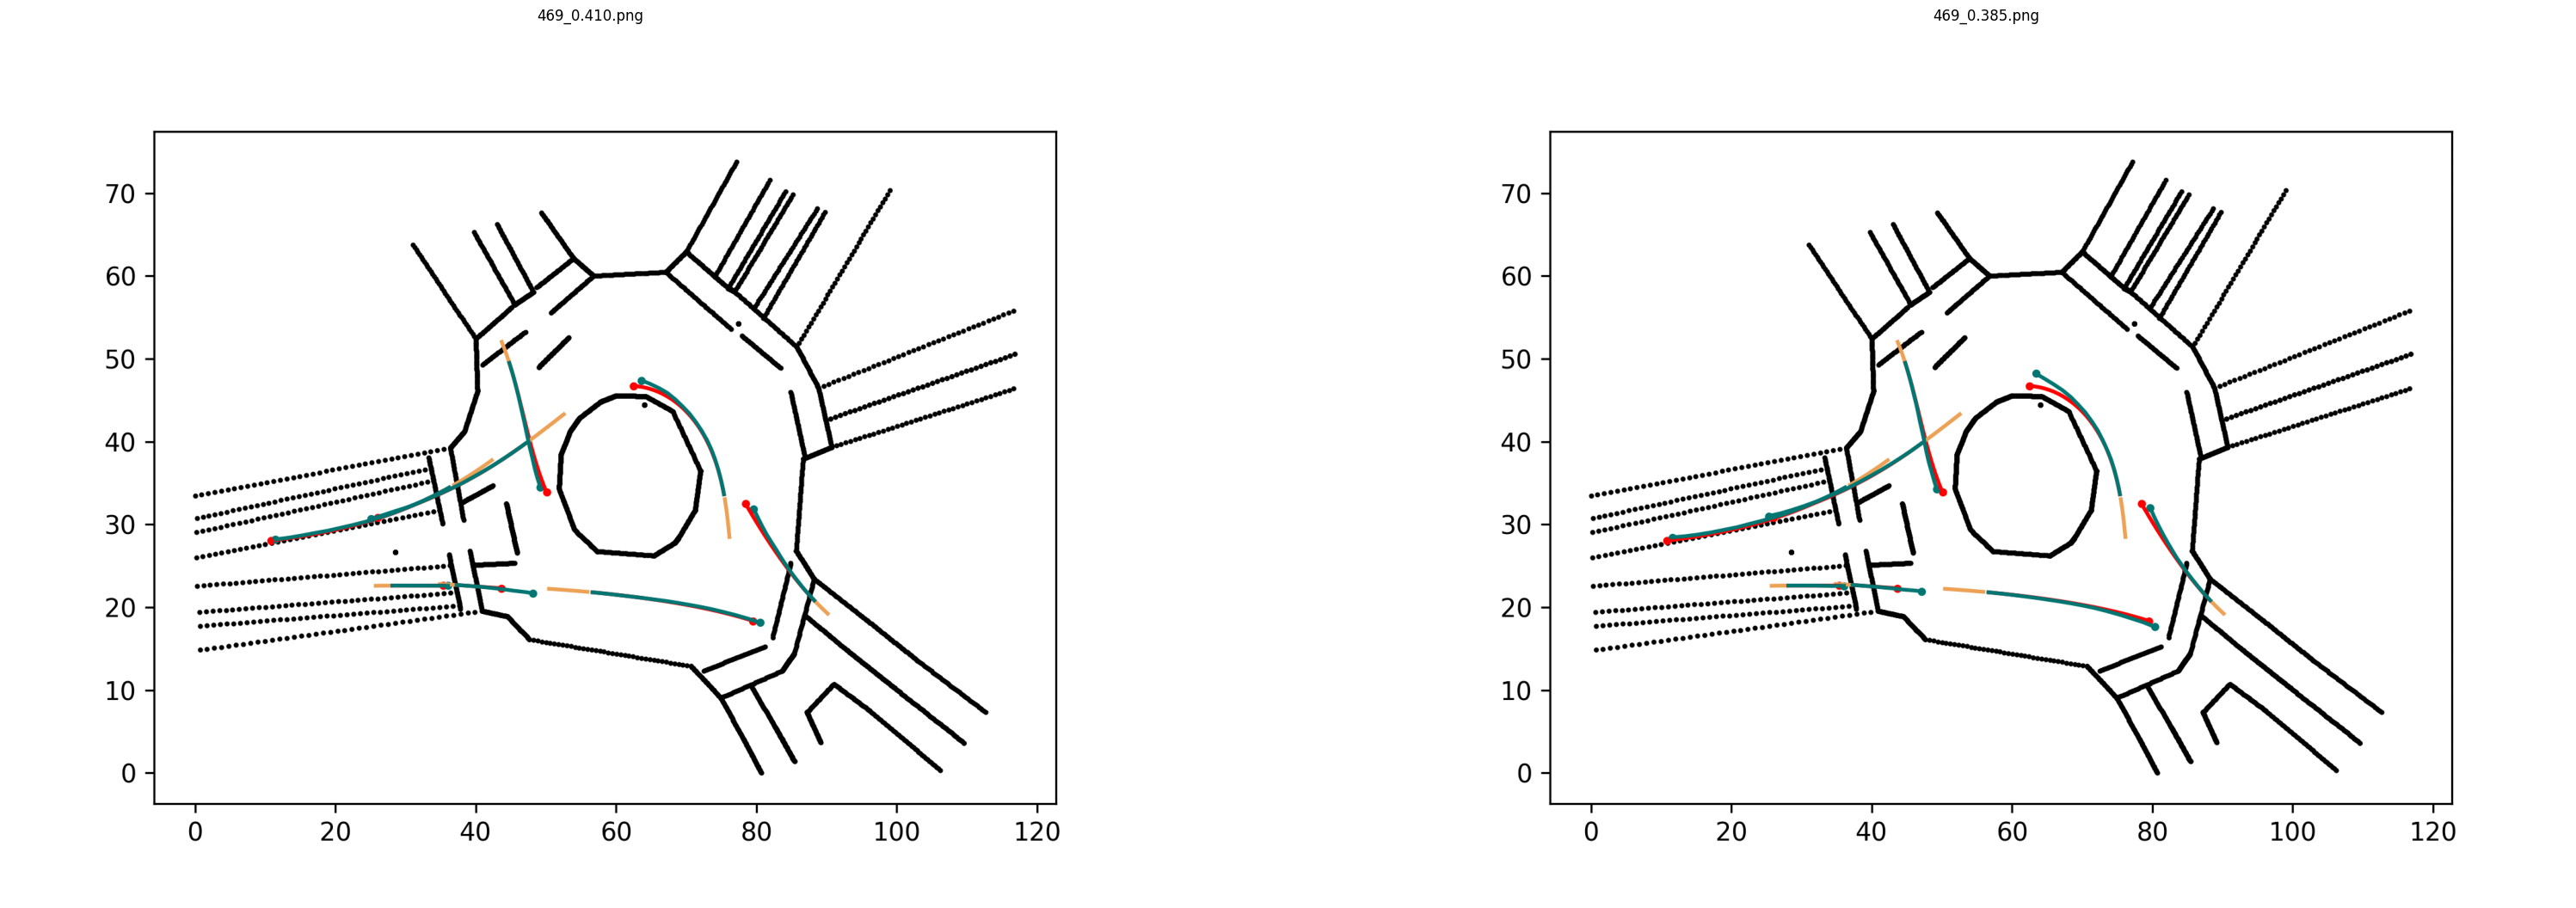

In [10]:


def show_two_images(img1_path, img2_path):
    # 读取图片
    img1 = mpimg.imread(img1_path)
    img2 = mpimg.imread(img2_path)

    # 获取图片分辨率
    dpi = 100
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    figsize = (w1/dpi*2, h1/dpi)
    
    # 创建画布和子图
    fig, axs = plt.subplots(1, 2,figsize=figsize, dpi=dpi)

    # 显示图片
    axs[0].imshow(img1)
    axs[0].axis('off')
    axs[0].set_title(os.path.basename(img1_path), fontsize=12)
    axs[1].set_title(os.path.basename(img2_path), fontsize=12)
    
    axs[1].imshow(img2)
    axs[1].axis('off')

    # 显示图像
    plt.show()

for i in range(min(len(ls),10)):
    path1=os.path.join(dir_base,ls[i][1][0])
    path2=os.path.join(dir_impr,ls[i][1][1])

    # 调用函数
    show_two_images(path1, path2)
